In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM


In [23]:
cnbc = pd.read_csv(r'C:\Users\avbalaji2\Desktop\Final_Year_Project\backend\training data\CNBC_tweets.csv')
elon = pd.read_csv(r'C:\Users\avbalaji2\Desktop\Final_Year_Project\backend\training data\elonmusk_tweets.csv')
financial = pd.read_csv(r'C:\Users\avbalaji2\Desktop\Final_Year_Project\backend\training data\FinancialTimes_tweets.csv')
jimcramer = pd.read_csv(r'C:\Users\avbalaji2\Desktop\Final_Year_Project\backend\training data\jimcramer_tweets.csv')
squawk = pd.read_csv(r'C:\Users\avbalaji2\Desktop\Final_Year_Project\backend\training data\SquawkCNBC_tweets.csv')
wsj = pd.read_csv(r'C:\Users\avbalaji2\Desktop\Final_Year_Project\backend\training data\WSJ_tweets.csv')
yahoo = pd.read_csv(r'C:\Users\avbalaji2\Desktop\Final_Year_Project\backend\training data\YahooFinance_tweets.csv')


In [24]:
df_new = pd.merge(cnbc, elon, on='date')

In [25]:
df_new = pd.merge(df_new, financial, on='date')

In [26]:
df_new = pd.merge(df_new, jimcramer, on='date')

In [27]:
df_new = pd.merge(df_new, squawk, on='date')

In [28]:
df_new = pd.merge(df_new, wsj , on='date')

In [29]:
df_new = pd.merge(df_new, yahoo , on='date')

In [30]:
df_new = df_new.drop('date',axis=1)

In [31]:
df_new.to_csv(r'C:\Users\avbalaji2\Desktop\Final_Year_Project\backend\training data\final_data.csv')

In [32]:
df_new

,cnbc_score,elon_score,finance_score,jim_score,squawk_score,wsj_score,yahoo_score
0,-0.519612,0.502973,-0.528512,0.000000,0.000000,-0.540101,0.540681
1,-0.548333,0.604263,-0.547598,-0.532647,-0.505757,-0.526910,-0.540841
2,0.589538,0.000000,0.000000,0.000000,-0.505757,-0.522390,0.000000
3,-0.523919,-0.536246,0.000000,0.000000,0.000000,-0.531673,0.615982
4,-0.531383,0.000000,0.508295,0.000000,0.538571,-0.506593,-0.543287
5,-0.550152,0.000000,0.000000,0.000000,0.000000,-0.533498,-0.531919
6,-0.550152,0.000000,0.000000,0.000000,0.000000,-0.518464,0.000000
7,-0.530470,0.000000,0.000000,0.000000,0.000000,0.000000,-0.530587
8,-0.535333,0.000000,0.000000,0.000000,0.000000,0.000000,-0.503070
9,-0.534841,0.518311,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
df_new = pd.read_csv(r'C:\Users\avbalaji2\Desktop\Final_Year_Project\backend\training data\final_data.csv')

In [37]:
df_new

,cnbc_score,elon_score,finance_score,jim_score,squawk_score,wsj_score,yahoo_score,BUY,SELL
0,-0.519612,0.502973,-0.528512,0.000000,0.000000,-0.540101,0.540681,1,0
1,-0.548333,0.604263,-0.547598,-0.532647,-0.505757,-0.526910,-0.540841,0,1
2,0.589538,0.000000,0.000000,0.000000,-0.505757,-0.522390,0.000000,0,1
3,-0.523919,-0.536246,0.000000,0.000000,0.000000,-0.531673,0.615982,1,0
4,-0.531383,0.000000,0.508295,0.000000,0.538571,-0.506593,-0.543287,1,0
5,-0.550152,0.000000,0.000000,0.000000,0.000000,-0.533498,-0.531919,0,0
6,-0.550152,0.000000,0.000000,0.000000,0.000000,-0.518464,0.000000,0,0
7,-0.530470,0.000000,0.000000,0.000000,0.000000,0.000000,-0.530587,0,1
8,-0.535333,0.000000,0.000000,0.000000,0.000000,0.000000,-0.503070,0,1
9,-0.534841,0.518311,0.000000,0.000000,0.000000,0.000000,0.000000,0,1


Text(0.5, 1.0, 'Yahoo Finance')

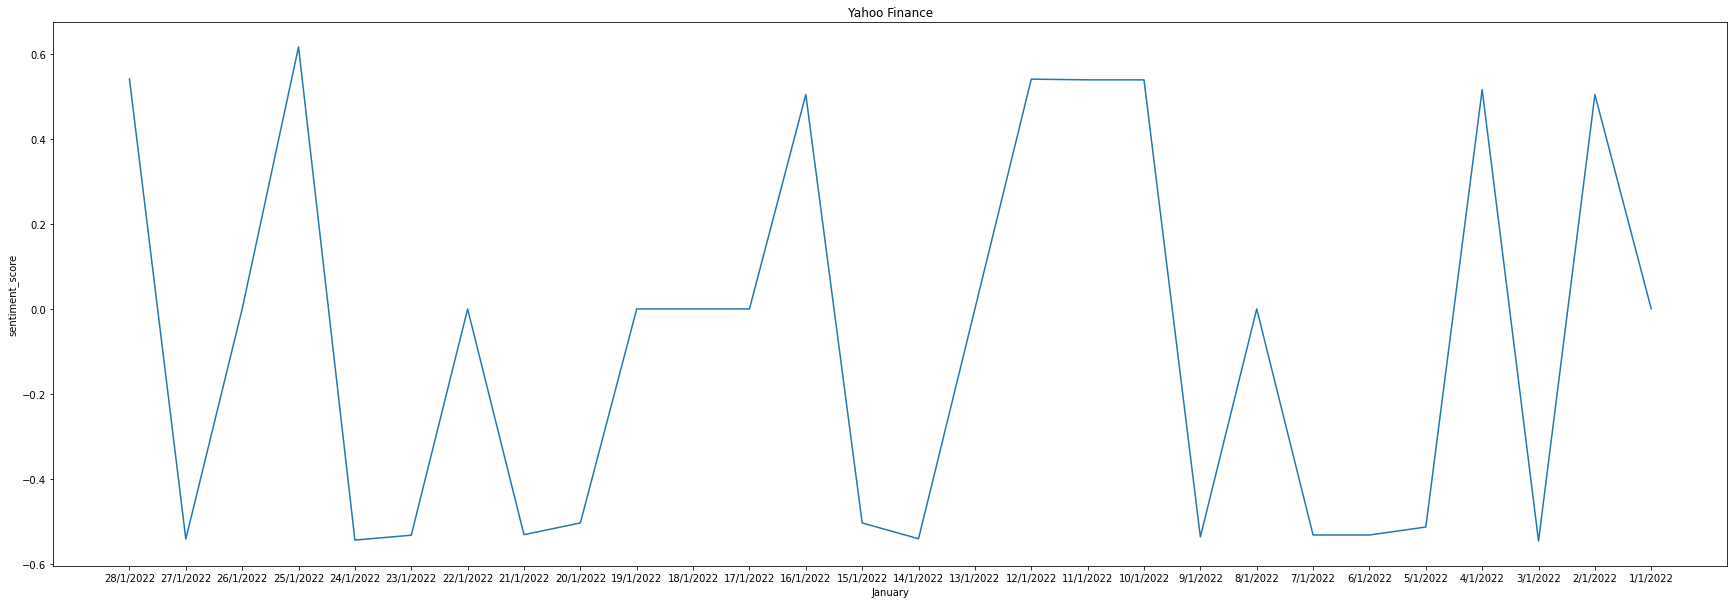

In [61]:
plt.figure(figsize=(30, 10))
display(plt.plot(yahoo['date'],df_new['yahoo_score']))
plt.xlabel('January')
plt.ylabel('sentiment_score')
plt.title('Yahoo Finance')

In [63]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
     X = []
     y = []
     start = start + window
     if end is None:
         end = len(dataset) - horizon
     for i in range(start, end):
         indices = range(i-window, i)
         X.append(dataset[indices])
         indicey = range(i+1, i+1+horizon)
         y.append(target[indicey])
     return np.array(X), np.array(y) 

In [77]:
X_data = df_new.drop(['BUY','SELL'],axis=1)
Y_data = df_new[['BUY','SELL']]

In [98]:
def create_dataset(dataset, time_step=1):
          dataX, dataY = [], []
          for i in range(len(dataset)-time_step-1):
              print(i)
              df = df_new.drop(['BUY','SELL'],axis=1)
              a = df[i:(i+time_step)]
              dataX.append(a)
              dataY.append(dataset[['BUY','SELL']].iloc[i + time_step])
          return np.array(dataX), np.array(dataY)

In [99]:
X_data,Y_data = create_dataset(df_new,7)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [100]:
Y_data

array([[0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 0]], dtype=int64)

In [101]:
X_data

array([[[-0.51961184,  0.5029725 , -0.5285116 ,  0.        ,
          0.        , -0.5401008 ,  0.54068065],
        [-0.54833263,  0.60426307, -0.5475979 , -0.5326473 ,
         -0.50575686, -0.52691   , -0.54084134],
        [ 0.5895384 ,  0.        ,  0.        ,  0.        ,
         -0.50575686, -0.52238977,  0.        ],
        [-0.5239189 , -0.5362457 ,  0.        ,  0.        ,
          0.        , -0.531673  ,  0.61598235],
        [-0.53138304,  0.        ,  0.5082951 ,  0.        ,
          0.5385708 , -0.5065925 , -0.54328704],
        [-0.550152  ,  0.        ,  0.        ,  0.        ,
          0.        , -0.5334982 , -0.5319193 ],
        [-0.550152  ,  0.        ,  0.        ,  0.        ,
          0.        , -0.51846385,  0.        ]],

       [[-0.54833263,  0.60426307, -0.5475979 , -0.5326473 ,
         -0.50575686, -0.52691   , -0.54084134],
        [ 0.5895384 ,  0.        ,  0.        ,  0.        ,
         -0.50575686, -0.52238977,  0.        ],
        

In [121]:
trainX, testX, trainy, testy = train_test_split(X_data, Y_data, test_size=0.33, random_state=42)
verbose, epochs, batch_size = 0, 15, 64
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
hist = model.fit(trainX, trainy, epochs=25, batch_size=batch_size, verbose=verbose)
# evaluate model
_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)


In [123]:
accuracy

0.2857142984867096

In [109]:
trainX.shape

(13, 7, 7)

In [110]:
trainy.shape

(13, 2)

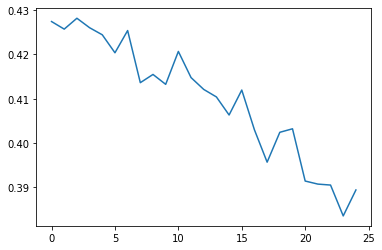

In [122]:
plt.plot(hist.history['loss'])

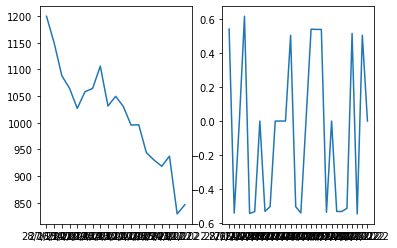

In [128]:
import numpy as np

dates = pd.read_csv(r'C:\Users\avbalaji2\Desktop\Final_Year_Project\backend\training data\test_date.csv')

#plot 1:
x = dates['date']
y = np.array([1199.78, 1149.59, 1088.12, 1064.70, 1026.96, 1058.12, 1064.40, 1106.22, 1031.56, 1049.61, 1030.51, 995.65, 996.27, 943.90, 930.00, 918.40, 937.41, 829.10, 846.35])

plt.subplot(1, 2, 1)
plt.plot(x,y)

#plot 2:
x = yahoo['date']
y = df_new['yahoo_score']

plt.subplot(1, 2, 2)
plt.plot(x,y)

plt.show()